# AUTHOR : Jaykumar Kadao


# GRIP@The Sparks Foundation

# Task -4

# Exploratory Data Analysis - Terrorism

In this task we will perform few analysis on our dataset to find out the hot zone of terrorism, what all security issues and insights you can derive by EDA.

Language : Python

IDE : Jupyter Notebook

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import dataset

df=pd.read_csv("D:\Sparks Foundation\Task 4\globalterrorismdb_0718dist.csv")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
nul = []
for i in df.columns:
    if df[i].isna().sum()>0:
        nul.append(i)
len(nul)

106

In [ ]:
for i in nul:
    df.drop(i,axis=1,inplace=True)
df.shape

(181691, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualisation

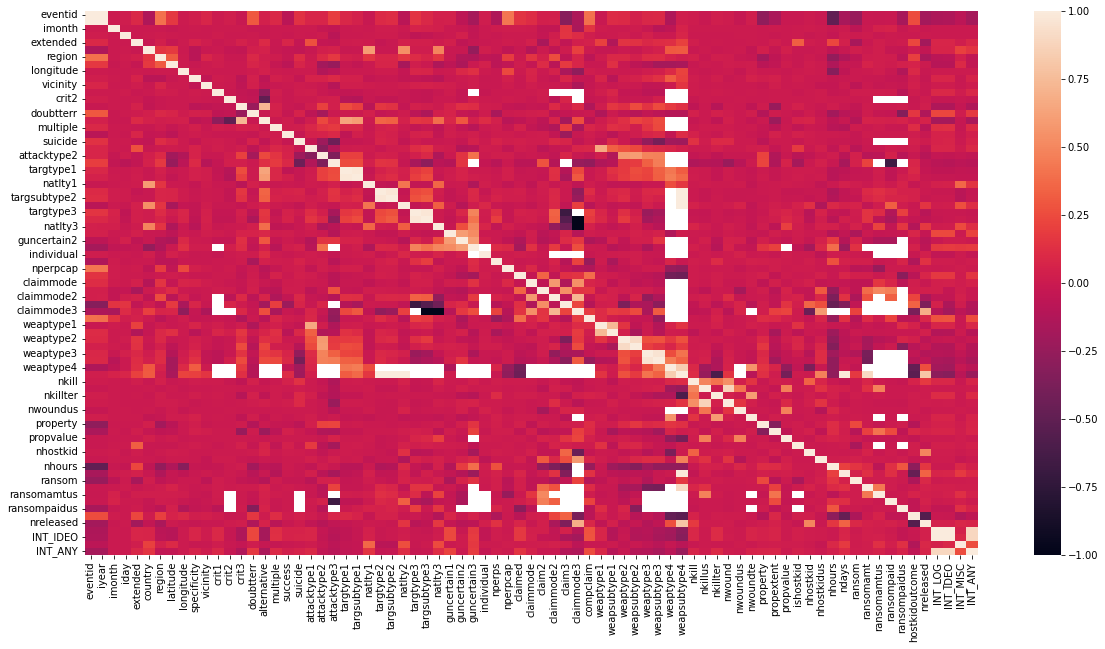

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

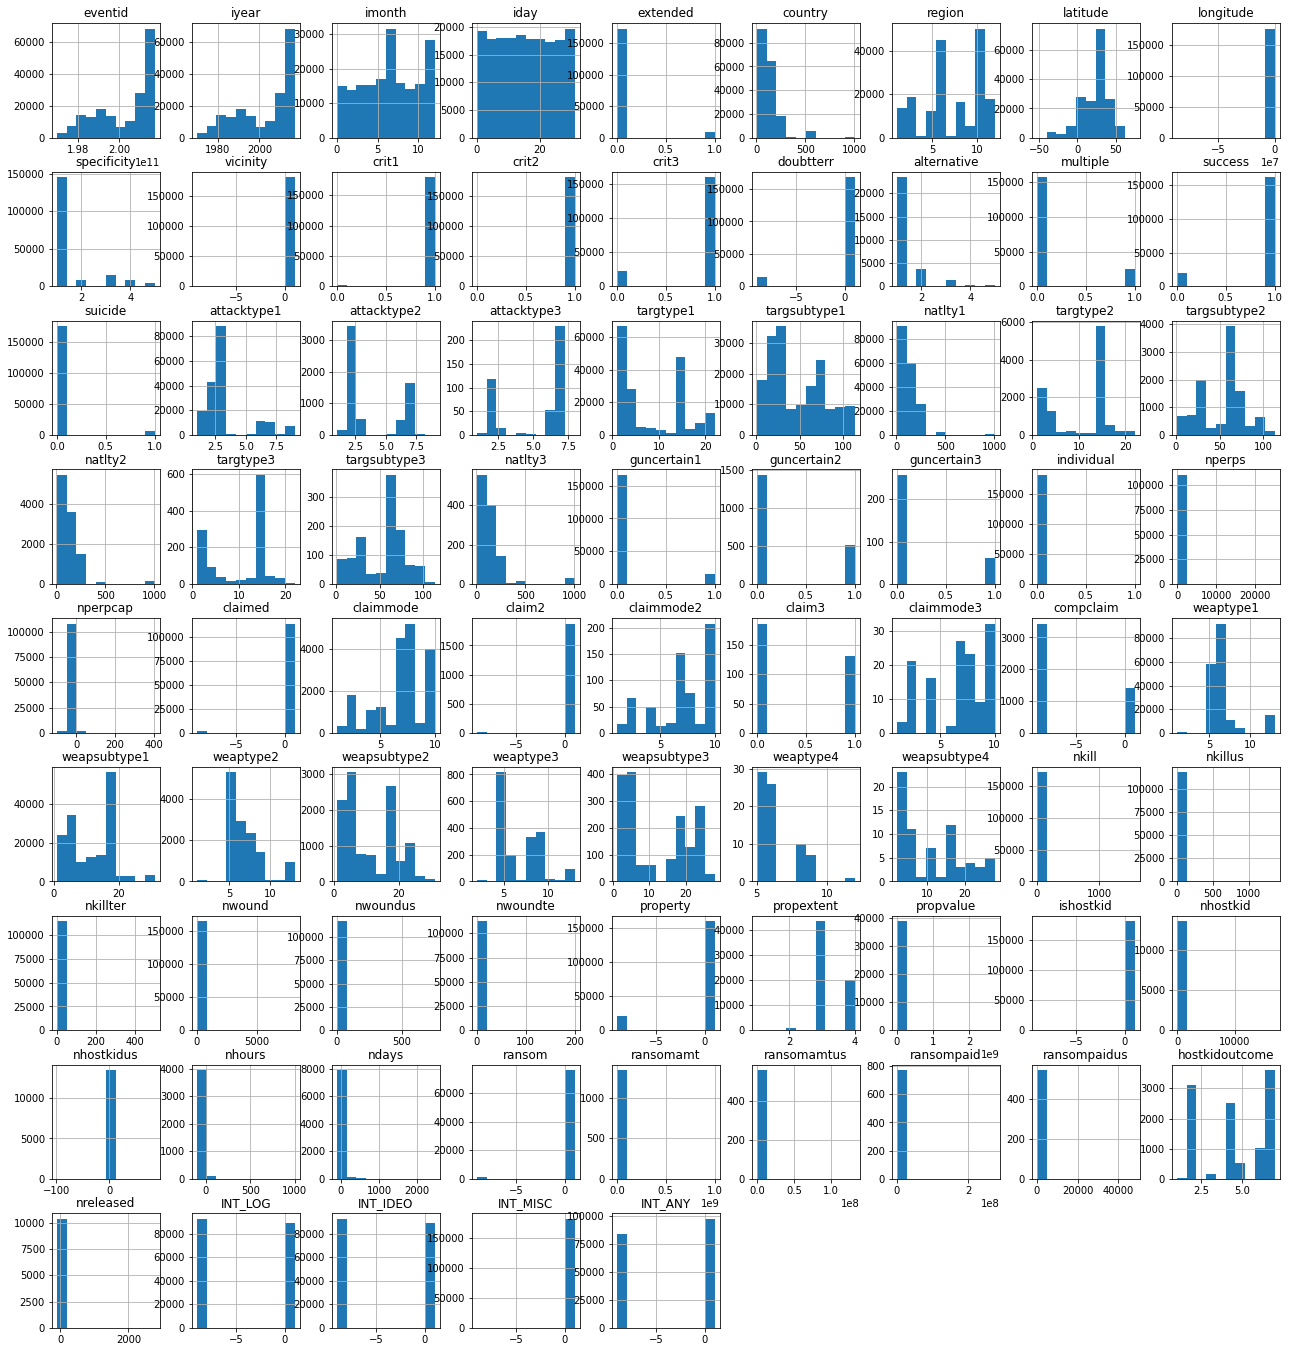

In [ ]:
df.hist(figsize=(22,24))
plt.show()

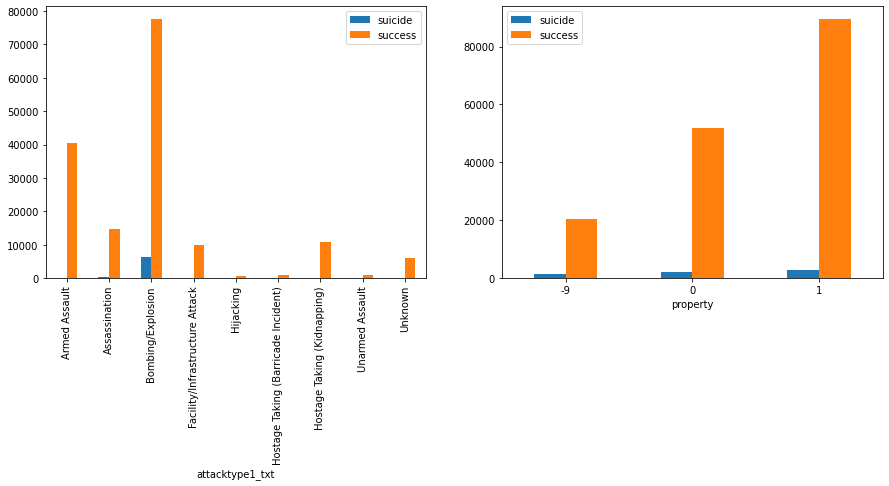

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
df.groupby('attacktype1_txt')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[0])
df.groupby('property')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[1])
plt.xticks(rotation=360)
plt.show()

<AxesSubplot:xlabel='weaptype1', ylabel='targtype1'>

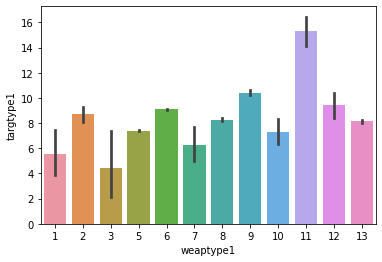

In [ ]:
sns.barplot(y=df['targtype1'], x=df['weaptype1'])

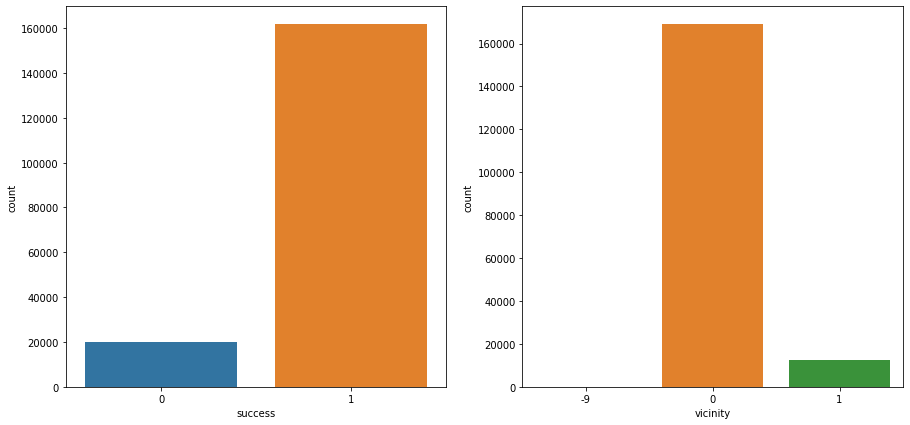

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.countplot(df.success,ax=axes[0])
sns.countplot(df.vicinity,ax=axes[1])
plt.show()

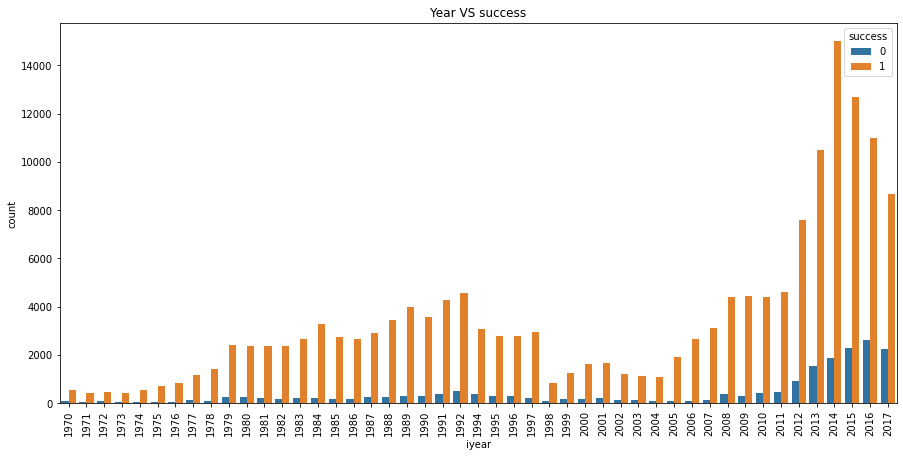

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,7))
sns.countplot(df['iyear'],hue=df['success'])
plt.xticks(rotation=90)
plt.title('Year VS success')
plt.show()

## Terrorist Organisation with Highest Terror Attacks

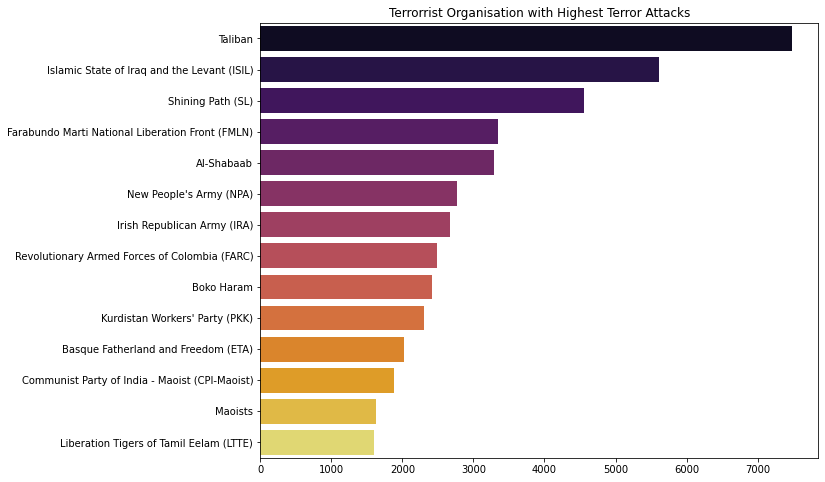

In [ ]:
sns.barplot(df['gname'].value_counts()[1:15].values,df['gname'].value_counts()[1:15].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorrist Organisation with Highest Terror Attacks')
plt.show()

## Countries Affected By Terrorist Attacks

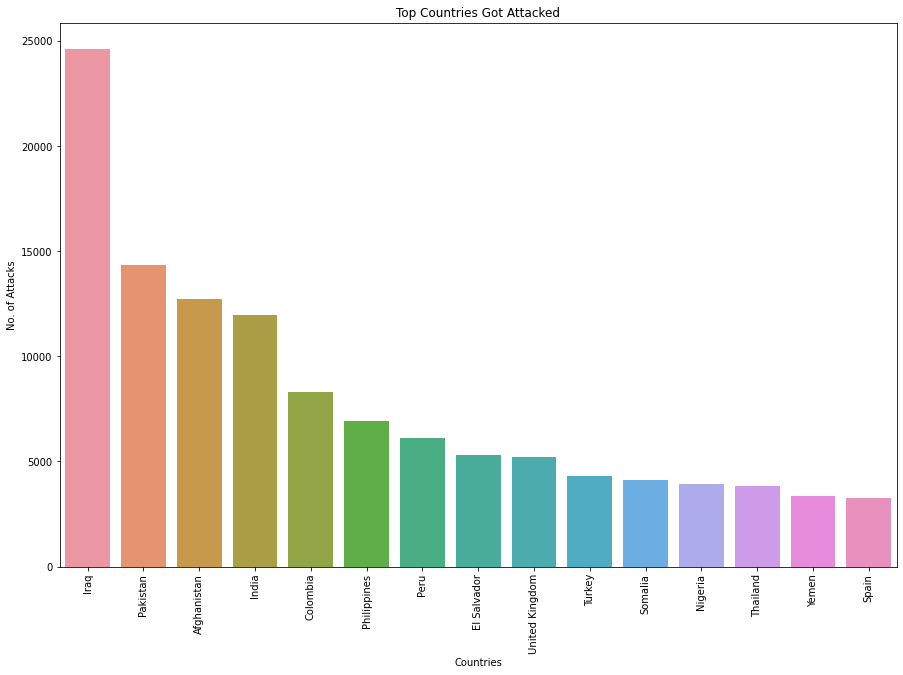

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['country_txt'].value_counts()[:15].index,y=df['country_txt'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.title('Top Countries Got Attacked')
plt.xlabel('Countries')
plt.ylabel('No. of Attacks')
plt.show()

Above graph shows that these top 15 countries got more attacks from terrorist organisation,
in which **India** comes in top 5 .

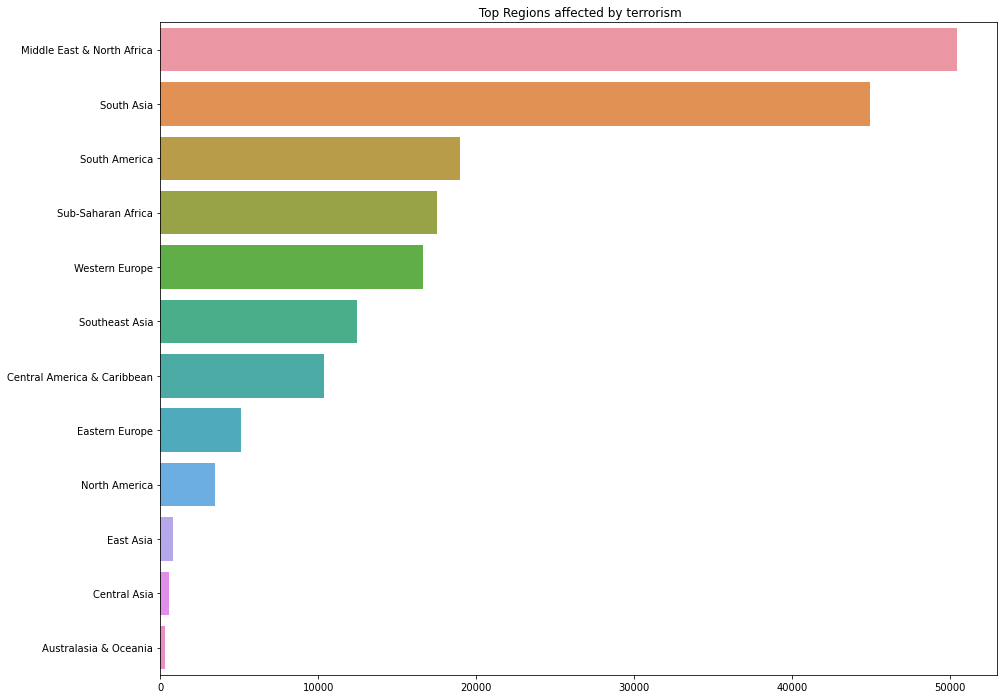

In [ ]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=360)
sns.barplot(x=df['region_txt'].value_counts().values,y=df['region_txt'].value_counts().index)
plt.title(' Top Regions affected by terrorism')
plt.show()

From above visualisation we can see that **Middle East and North Africa** are regions where most terrorist activity occurs.  

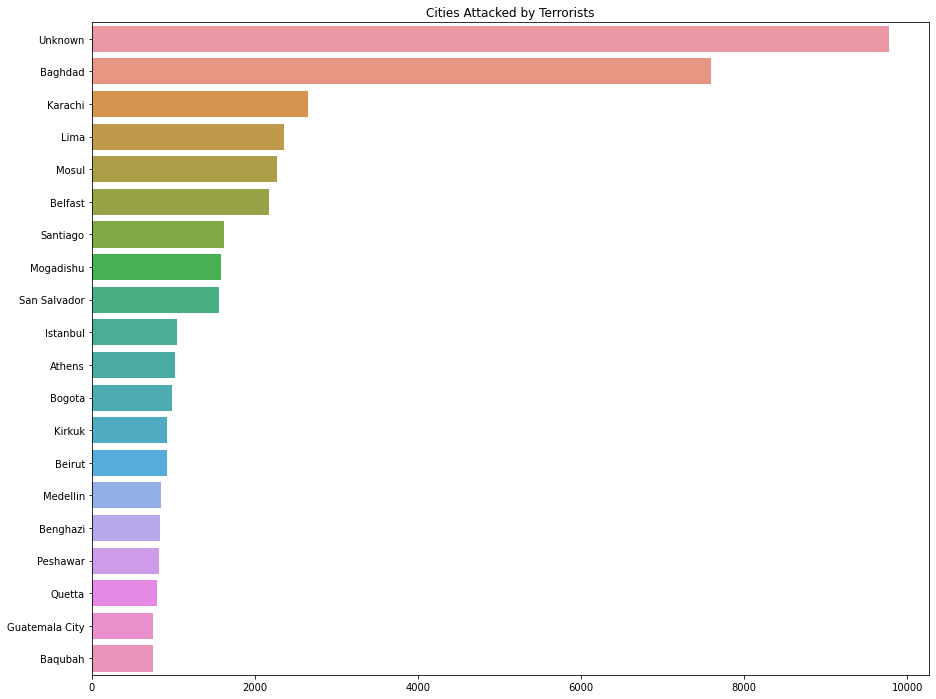

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=df['city'].value_counts()[:20].values,y=df['city'].value_counts()[:20].index)
plt.xticks(rotation=360)
plt.title('Cities Attacked by Terrorists')
plt.show()

From above graph we can see that cities like **Baghdad, Karachi, Mosul** are more attacks happened.

## Number Of Attacks From Year 1970 To 2017

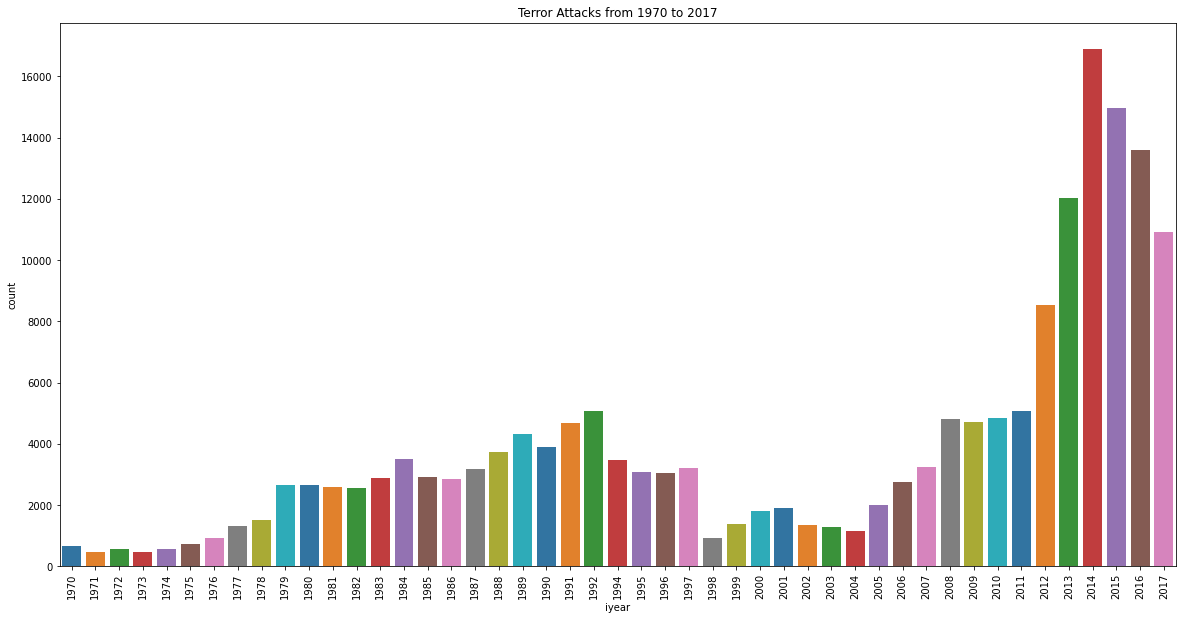

In [ ]:
plt.subplots(1,1,figsize=(20,10))
sns.countplot(x=df.iyear,palette='tab10')
plt.xticks(rotation=90)
plt.title('Terror Attacks from 1970 to 2017')
plt.show()

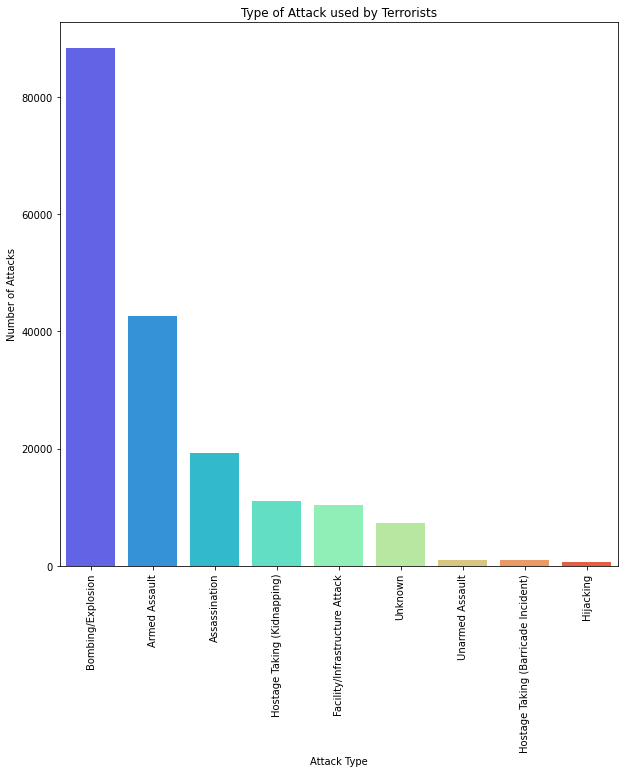

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['attacktype1_txt'],order=df['attacktype1_txt'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Type of Attack used by Terrorists')
plt.ylabel('Number of Attacks')
plt.show()

From above graph we found that Bombing/Explosion is widely used type for terrorist attack.

## Attacks Targets

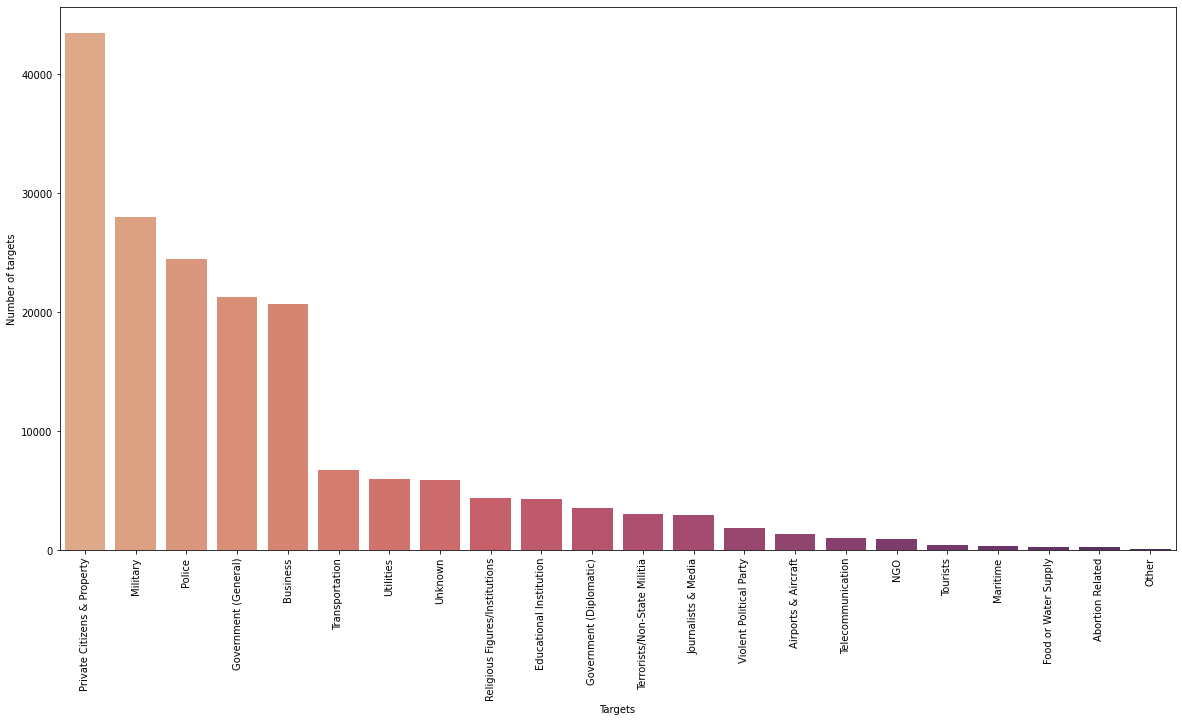

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Targets')
plt.ylabel('Number of targets')
plt.show()

From above graph we found that, Private citizens & Property get more affected by terrorism.

## Conclusion

 • Most number of attacks were done by unknown group.

 • There is growth in terrorist attacks from 1977 to 1981 & from 2005 to 2014.

 • Business and Private Citizens & Property were most targeted during terrorist attacks.

 • Bombing/Explosion is most used type for terrorist attack.

 • Middle east & north africa is most affected by terrorism.

 • Iraq is most attacked country on planet earth.

 • Terrorist organisation name Taliban holds highest attacks.


Thank You